In [11]:
from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd
from itertools import product
sns.set_context('talk')
import generate_power_spectrum as gps
from pyDOE import *

In [2]:
h_range = np.linspace(0.4,0.8,2)
omc_range = np.linspace(0.2, 0.3, 2)

pairs = list(product(h_range, omc_range))

In [4]:
dict_list = []


for i, (h, omc) in enumerate(pairs):
    
    k, pk_lin = gps.get_power_spectrum(h, omc, mode = 'linear')
    
    k, pk_nonlin = gps.get_power_spectrum(h, omc)
    
    result_dict = {'h': h, 'omc':omc, 'k': k, 'pk': pk_nonlin/pk_lin}
    
    dict_list.append(result_dict)
    

In [5]:
df = pd.DataFrame(dict_list)

In [15]:
df

,h,omc,k,pk
0,0.4,0.2,"[0.0001, 0.00010473708979594497, 0.00010969857...","[1.000000995259361, 1.0000011627533008, 1.0000..."
1,0.4,0.3,"[0.0001, 0.00010473708979594497, 0.00010969857...","[1.0000032853931704, 1.0000034738926735, 1.000..."
2,0.8,0.2,"[0.0001, 0.00010473708979594497, 0.00010969857...","[1.0000017101468885, 1.0000017221784367, 1.000..."
3,0.8,0.3,"[0.0001, 0.00010473708979594497, 0.00010969857...","[0.9999996413964783, 0.9999996541426692, 0.999..."


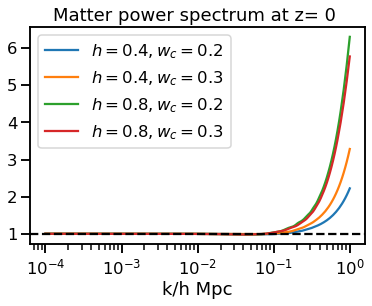

In [25]:

for i in range(len(df)):
    plt.semilogx(df['k'][i], df['pk'][i][:],
              label = f'$h = {df.h[i]}, w_c = {df.omc[i]}$')
plt.axhline(y = 1, linestyle='dashed', color = 'black')
plt.title('Matter power spectrum at z= 0 ');
plt.xlabel('k/h Mpc');


plt.legend()

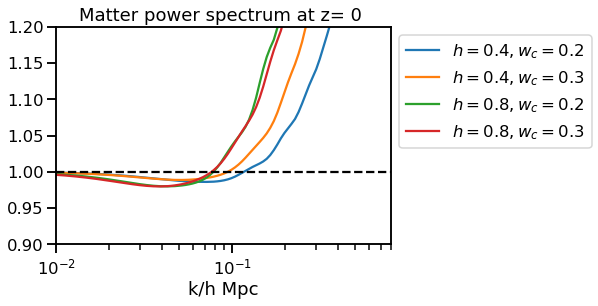

In [26]:

for i in range(len(df)):
    plt.semilogx(df['k'][i], df['pk'][i][:],
              label = f'$h = {df.h[i]}, w_c = {df.omc[i]}$')
plt.axhline(y = 1, linestyle='dashed', color = 'black')
plt.title('Matter power spectrum at z= 0 ');
plt.xlabel('k/h Mpc');

plt.ylim(0.9, 1.2)
plt.xlim(1e-2, 8e-1)
plt.legend(bbox_to_anchor = (1,1))

In [12]:
def latin_hypercube(n_pts, mins, maxs):
    """
    Returns the n_pts number of samples in a latin hypercube.
    """
    #return a latin_hypercube
    design = lhs(np.size(maxs), samples=n_pts)   
    for i in range(2):
        design[:, i] = design[:, i] * (maxs[i]-mins[i]) + mins[i]    
    return design

#DARK QUEST I
#0.0211375 < ωb < 0.0233625,
#0.10782 < ωc < 0.13178,
design = latin_hypercube(1000, [0.0211375, 0.10782], [0.0233625,  0.13178])


In [23]:
[{'h': h, 'o':o} for h,o in list(zip(design[:,0], design[:,1]))]

[{'h': 0.021319588564890014, 'o': 0.12257637030299635},
 {'h': 0.02299918437399177, 'o': 0.1256112253815007},
 {'h': 0.022431222091411376, 'o': 0.1306524916088994},
 {'h': 0.02317985935815252, 'o': 0.12033387165737952},
 {'h': 0.02130628538116948, 'o': 0.1142798856994704},
 {'h': 0.021555648515714405, 'o': 0.11122213337182875},
 {'h': 0.02257978188474813, 'o': 0.12769971501860528},
 {'h': 0.02149687583984079, 'o': 0.12564107887236967},
 {'h': 0.02167172555905574, 'o': 0.1311635173615369},
 {'h': 0.022836040278845334, 'o': 0.12794735416151104},
 {'h': 0.022344184557436864, 'o': 0.11391218324187205},
 {'h': 0.022649684320970816, 'o': 0.1274105036590686},
 {'h': 0.02221938125734374, 'o': 0.12868193703447325},
 {'h': 0.021669231043560944, 'o': 0.12281059253884517},
 {'h': 0.021491576054972927, 'o': 0.1315112747291494},
 {'h': 0.022433438386475654, 'o': 0.11797398377103649},
 {'h': 0.02126182213005092, 'o': 0.12176227281955601},
 {'h': 0.021374726655771874, 'o': 0.11145829955542068},
 {'h':

(0.10782, 0.13178)

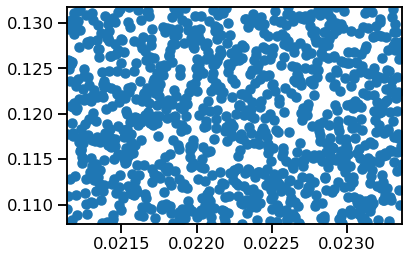

In [13]:

plt.scatter(design[:,0], design[:, 1])
plt.xlim(0.0211375, 0.0233625)
plt.ylim(0.10782, 0.13178)